# 画图种类

## Scatter 散点图

> 本节我们将讲述各种不同的plot的方式。之前我们讲到了如何plot线，今天我们讲述如何plot散点图。 今天用到的例子最终呈现的结果如下图：


### 散点图
> 首先，先引入matplotlib.pyplot简写作plt,再引入模块numpy用来产生一些随机数据。生成1024个呈标准正态分布的二维数据组 (平均数是0，方差为1) 作为一个数据集，并图像化这个数据集。每一个点的颜色值用T来表示：

In [1]:
import matplotlib.pyplot as plt
import numpy as np

n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value

输入X和Y作为location，size=75，颜色为T，color map用默认值，透明度alpha 为 50%。 x轴显示范围定位(-1.5，1.5)，并用xtick()函数来隐藏x坐标轴，y轴同理：

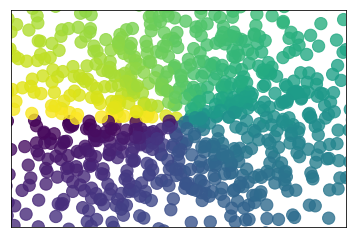

X:[-1.14617341  0.19817326  2.94361446 ...  0.02674152  0.49823653
  0.83739606] Len:1024
Y:[ 0.8425881  -0.10723956 -0.25195068 ...  0.59775869  1.19250032
 -0.0865168 ] Len:1024
T:[ 2.50767554 -0.49601582 -0.08538418 ...  1.52608981  1.17503285
 -0.10295119] Len:1024


In [11]:
plt.scatter(X, Y, s=150, c=T, alpha=.8)

plt.xlim(-1.5, 1.5)
plt.xticks(())  # ignore xticks
plt.ylim(-1.5, 1.5)
plt.yticks(())  # ignore yticks

plt.show()
print('X:{} Len:{}'.format(X,len(X)))
print('Y:{} Len:{}'.format(Y, len(Y)))
print('T:{} Len:{}'.format(T, len(T)))

## Bar 柱状图

> 相关代码
本节我们介绍一下用matplotib来制作一个柱状图

### 生成基本图形
> 向上向下分别生成12个数据，X为 0 到 11 的整数 ，Y是相应的均匀分布的随机数据。 使用的函数是plt.bar，参数为X和Y：

X:[ 0  1  2  3  4  5  6  7  8  9 10 11]
Y1:[0.93741557 0.77526491 0.81690424 0.58011617 0.58187044 0.42634683
 0.44353007 0.28873873 0.29773218 0.21715574 0.13911816 0.05550261]
Y2:[0.75985354 0.84951848 0.61853645 0.58607409 0.46899101 0.30918777
 0.45920733 0.23447894 0.24882997 0.20446164 0.14976758 0.07973073]


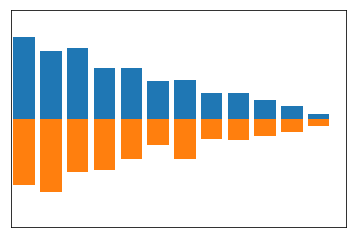

In [33]:
import matplotlib.pyplot as plt
import numpy as np

n = 12
X = np.arange(n)

Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

print("X:{}".format(X))
print("Y1:{}".format(Y1))
print("Y2:{}".format(Y2))

plt.bar(X, +Y1)
plt.bar(X, -Y2)

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.show()

## 加颜色和数据
> 下面我们就颜色和数值进行优化。 用facecolor设置主体颜色，edgecolor设置边框颜色为白色

<BarContainer object of 12 artists>

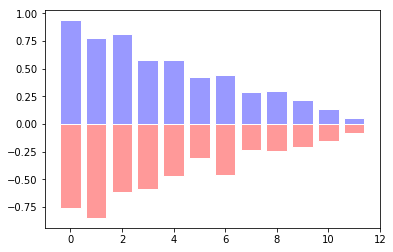

In [34]:
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

接下来我们用函数 **plt.text** 分别在柱体上方（下方）加上数值，用%.2f保留两位小数，横向居中对齐ha='center'，纵向底部（顶部）对齐va='bottom'：

X:[ 0  1  2  3  4  5  6  7  8  9 10 11]
Y1:[0.94783284 0.61728987 0.54551491 0.39791891 0.65535485 0.53488057
 0.49062375 0.35815156 0.27826618 0.24282753 0.14397741 0.04366743]
Y2:[0.92803071 0.70423481 0.7583689  0.68066131 0.50053675 0.31246497
 0.44687986 0.41490701 0.22836498 0.16468965 0.11225719 0.04885353]


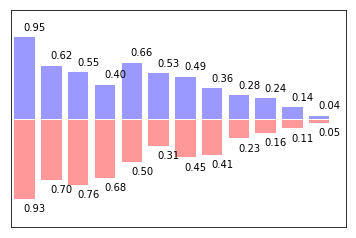

In [42]:
import matplotlib.pyplot as plt
import numpy as np

n = 12
X = np.arange(n)

Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

print("X:{}".format(X))
print("Y1:{}".format(Y1))
print("Y2:{}".format(Y2))

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

for x, y in zip(X, Y1):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va='bottom')

for x, y in zip(X, Y2):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x + 0.4, -y - 0.05, '%.2f' % y, ha='center', va='top')

plt.show()